# Artificial Neuron

## Activation Functions

In [ ]:
# Standard libraries
import math
from typing import Callable

# 3pps
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_function(name_function: str, steps: np.ndarray, function: Callable) -> None:
    plt.title(f"{name_function} function")
    plt.plot(steps, function(steps))
    plt.grid()
    plt.show()

In [ ]:
def sigmoid(input: np.ndarray) -> np.ndarray:
    return 1/(1+np.exp((-1) * input))


def tanh(input: np.ndarray) -> np.ndarray:
    return (np.exp(input) - np.exp(-input)) / (np.exp(input) + np.exp(-input))


def relu(input: np.ndarray) -> np.ndarray:
    return [max(0, elem) for elem in input]


def leaky_relu(input: np.ndarray, alpha: float = 0.1) -> np.ndarray:
    return [max(0.1 * elem, elem) for elem in input]


def elu(input: np.ndarray, alpha: float = 0.5) -> np.ndarray:
    return [alpha * (np.exp(elem) - 1) if elem < 0 else elem for elem in input]


def swish(input: np.ndarray) -> np.ndarray:
    return input * sigmoid(input)


def gelu(input: np.ndarray) -> np.ndarray:
    return 0.5 * input * (1 + tanh(math.sqrt(2/math.pi) * (input + 0.044715 * input ** 3)))

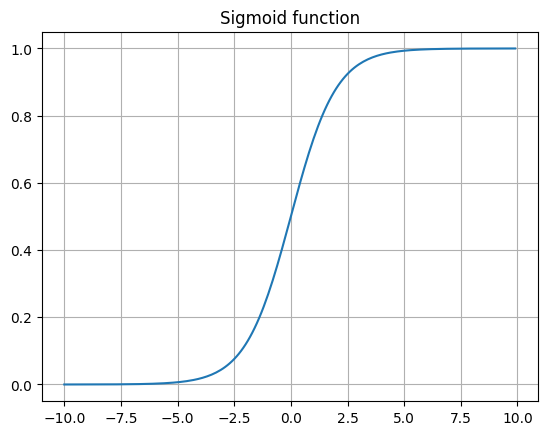

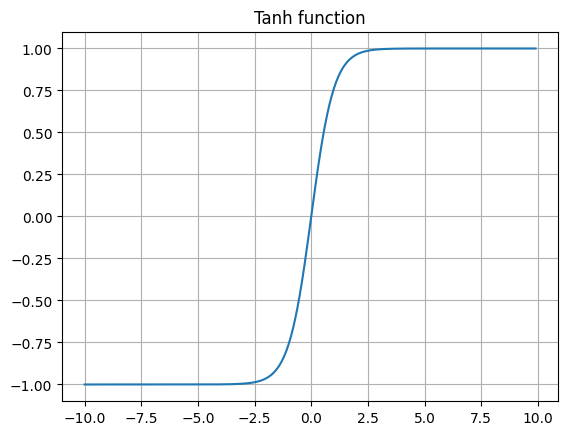

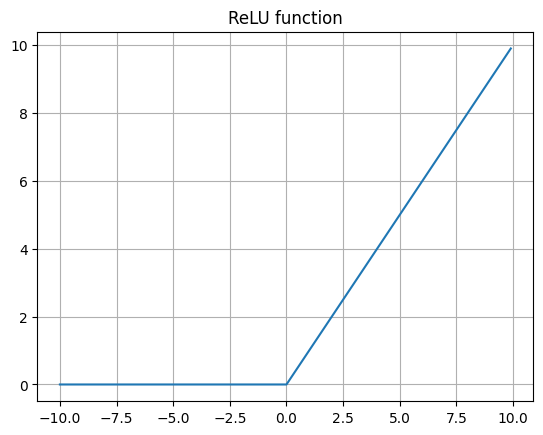

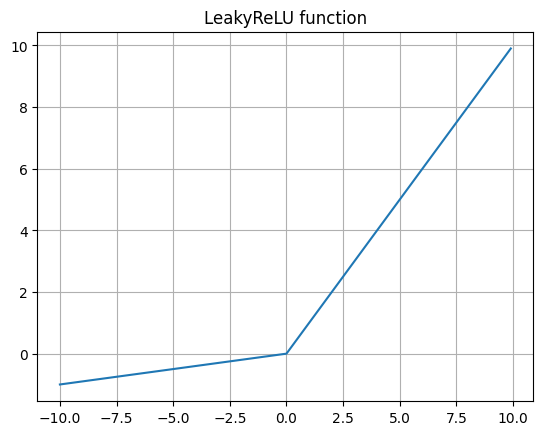

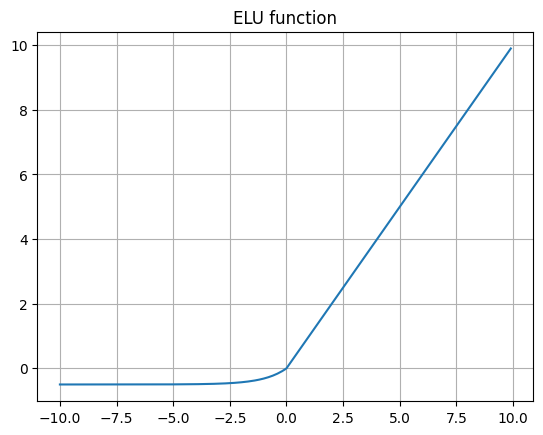

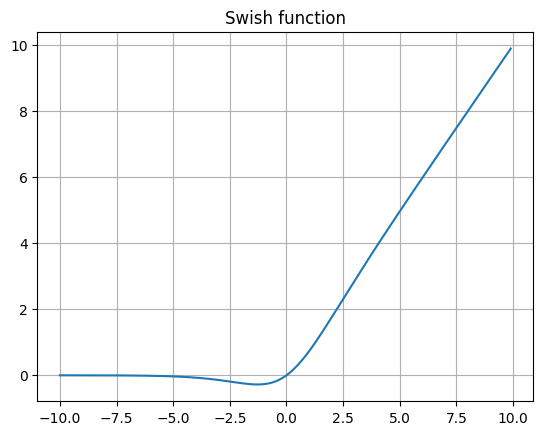

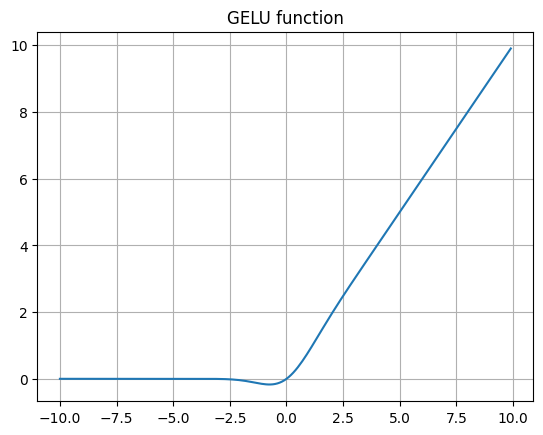

In [ ]:
steps = np.arange(-10, 10, 0.1)

plot_function(name_function="Sigmoid", steps=steps, function=sigmoid)
plot_function(name_function="Tanh", steps=steps, function=tanh)
plot_function(name_function="ReLU", steps=steps, function=relu)
plot_function(name_function="LeakyReLU", steps=steps, function=leaky_relu)
plot_function(name_function="ELU", steps=steps, function=elu)
plot_function(name_function="Swish", steps=steps, function=swish)
plot_function(name_function="GELU", steps=steps, function=gelu)

## Classification Toy Example

In [ ]:
# Standard libraries
import math

# 3pps
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch import nn

In [ ]:
class BinaryClassifier(nn.Module):

    def __init__(self, num_classes: int) -> None:

        super().__init__()

        self.num_classes = num_classes

        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.GELU(),           
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, input_tensor: torch.Tensor) -> torch.Tensor:

        return self.model(input_tensor)

In [ ]:
n_samples = 1000
X, y = make_circles(
    n_samples, noise=0.03, random_state=42
)
X.shape, y.shape

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
model = BinaryClassifier(num_classes=2)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=3e-2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
print(y_train.min(), y_train.max(), y_train.dtype)
print(y_test.min(), y_test.max(), y_test.dtype)

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [ ]:
num_epochs = 20
batch_size = 32
num_batches = math.ceil(len(X_train) / batch_size)
num_batches_test = math.ceil(len(X_test) / batch_size)

plot_loss_train = []
plot_loss_test = []
plot_acc_train = []
plot_acc_test = []

for epoch in range(num_epochs): 
    loss_epoch_train = []
    loss_epoch_test = []
    accuracy_train = []
    accuracy_test = []
    
    model.train()
    for i in range(num_batches):
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        y_batch = y_train[i * batch_size : (i + 1) * batch_size].view(-1, 1)

        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = loss_function(predictions, y_batch)
        loss.backward()
        optimizer.step()

        loss_epoch_train.append(loss.item())
        pred_labels = (predictions >= 0.5).float()
        acc = (pred_labels == y_batch).float().mean().item() * 100
        accuracy_train.append(acc)

    model.eval()
    with torch.inference_mode():
        for i in range(num_batches_test):
            X_test_batch = X_test[i * batch_size : (i + 1) * batch_size]
            y_test_batch = y_test[i * batch_size : (i + 1) * batch_size].view(-1, 1)

            predictions_inference = model(X_test_batch)
            loss_test = loss_function(predictions_inference, y_test_batch)
            loss_epoch_test.append(loss_test.item())

            pred_labels_test = (predictions_inference >= 0.5).float()
            acc_test = (pred_labels_test == y_test_batch).float().mean().item() * 100
            accuracy_test.append(acc_test)

    # Promedios de la época
    train_loss_mean = np.mean(loss_epoch_train)
    test_loss_mean = np.mean(loss_epoch_test)
    train_acc_mean = np.mean(accuracy_train)
    test_acc_mean = np.mean(accuracy_test)

    print(
        f"Epoch: {epoch+1}, "
        f"Train Loss: {train_loss_mean:.4f}, "
        f"Test Loss: {test_loss_mean:.4f}, "
        f"Train Acc: {train_acc_mean:.2f}%, "
        f"Test Acc: {test_acc_mean:.2f}%"
    )

    # Guardar para graficar
    plot_loss_train.append(train_loss_mean)
    plot_loss_test.append(test_loss_mean)
    plot_acc_train.append(train_acc_mean)
    plot_acc_test.append(test_acc_mean)

In [ ]:
plt.plot(range(num_epochs), plot_loss_train, label="Train Loss")
plt.plot(range(num_epochs), plot_loss_test, label="Test Loss")
plt.legend()
plt.show()

plt.plot(range(num_epochs), plot_acc_train, label="Train Acc")
plt.plot(range(num_epochs), plot_acc_test, label="Test Acc")
plt.legend()
plt.show()

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()
with torch.inference_mode():
    predictions=model(X_test)
predictions = np.where(predictions.numpy() >= 1e-1, 1, 0)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)
plt.show()